In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
files.upload()

Saving kyphosis.csv to kyphosis.csv


{'kyphosis.csv': b'"Kyphosis","Age","Number","Start"\n"absent",71,3,5\n"absent",158,3,14\n"present",128,4,5\n"absent",2,5,1\n"absent",1,4,15\n"absent",1,2,16\n"absent",61,2,17\n"absent",37,3,16\n"absent",113,2,16\n"present",59,6,12\n"present",82,5,14\n"absent",148,3,16\n"absent",18,5,2\n"absent",1,4,12\n"absent",168,3,18\n"absent",1,3,16\n"absent",78,6,15\n"absent",175,5,13\n"absent",80,5,16\n"absent",27,4,9\n"absent",22,2,16\n"present",105,6,5\n"present",96,3,12\n"absent",131,2,3\n"present",15,7,2\n"absent",9,5,13\n"absent",8,3,6\n"absent",100,3,14\n"absent",4,3,16\n"absent",151,2,16\n"absent",31,3,16\n"absent",125,2,11\n"absent",130,5,13\n"absent",112,3,16\n"absent",140,5,11\n"absent",93,3,16\n"absent",1,3,9\n"present",52,5,6\n"absent",20,6,9\n"present",91,5,12\n"present",73,5,1\n"absent",35,3,13\n"absent",143,9,3\n"absent",61,4,1\n"absent",97,3,16\n"present",139,3,10\n"absent",136,4,15\n"absent",131,5,13\n"present",121,3,3\n"absent",177,2,14\n"absent",68,5,10\n"absent",9,2,17\n"pres

In [3]:
df = pd.read_csv('kyphosis.csv')

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


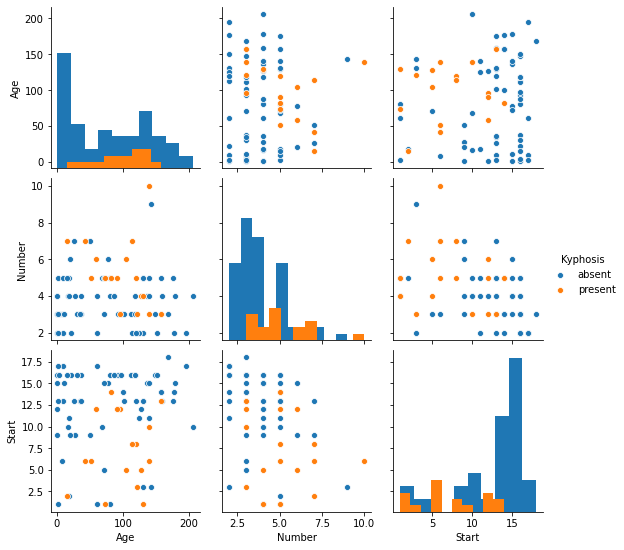

In [6]:
sns.pairplot(df,hue="Kyphosis",diag_kind="hist")

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dtree = DecisionTreeClassifier()

In [25]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
predictions = dtree.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.84      0.80      0.82        20
     present       0.33      0.40      0.36         5

    accuracy                           0.72        25
   macro avg       0.59      0.60      0.59        25
weighted avg       0.74      0.72      0.73        25



In [29]:
print(confusion_matrix(y_test,predictions))

[[16  4]
 [ 3  2]]


In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
rfc_pred = rfc.predict(X_test)

In [55]:
print(confusion_matrix(y_test,rfc_pred))

[[17  3]
 [ 4  1]]


In [52]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.82      0.90      0.86        20
     present       0.33      0.20      0.25         5

    accuracy                           0.76        25
   macro avg       0.58      0.55      0.55        25
weighted avg       0.72      0.76      0.74        25

